# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:10<00:00, 5.81KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

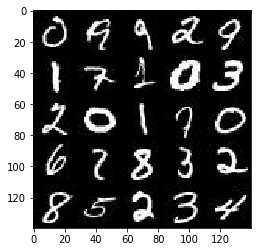

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

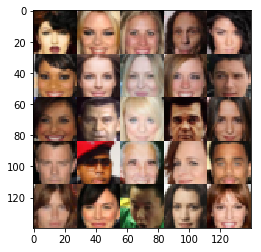

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'real_input')
    z_data = tf.placeholder(tf.float32, (None, z_dim), name = 'z_data')
    learning_rate = tf.placeholder(tf.float32)

    return (real_input, z_data, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [173]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    #Input 28x28x_
    with tf.variable_scope('discriminator', reuse = reuse):
        #Layer 1
        x1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = 'SAME')
        lrelu1 = tf.maximum(alpha * x1, x1)
        #14x14x64
        
        #Layer 2
        x2 = tf.layers.conv2d(lrelu1, 128, 5, strides = 2, padding = 'SAME')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        #7x7x128
        
        #Layer 3
        x3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        #4x4x256
        
        #Fully connected layer
        fc = tf.reshape(lrelu3, (-1, 4*4*256))
        logits = tf.layers.dense(fc, 1)
        out = tf.sigmoid(logits)

    return (out, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [205]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse = not is_train):
        # First fully connected layer
        fc = tf.layers.dense(z, 4*4*512)
        #Reshape for deconvolutional stack
        x1 = tf.reshape(fc, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        #4x4x256
        
        #Layer 2
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        #7x7x128

        #Layer 3
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        #14x14x64
        
        #Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #28x28xout_channel_dim
        
        out = tf.tanh(logits)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [206]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [207]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)

    return (d_train_opt, g_train_opt)
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [208]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [214]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    if data_image_mode is 'RGB': number_channels = 3
    else: number_channels = 1
    
    #model_inputs(image_width, image_height, image_channels, z_dim):
    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], number_channels, z_dim)
    #model_loss(input_real, input_z, out_channel_dim)
    d_loss, g_loss = model_loss(input_real, input_z, number_channels)
    
    #model_opt(d_loss, g_loss, learning_rate, beta1)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0   
    print_every = 10
    show_every = 100
    n_images = 25
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                #Scale images from [-0.5, 0.5] to [-1, 1]
                batch_images = np.multiply(batch_images, 2)

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, number_channels, data_image_mode)



### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4529... Generator Loss: 2.0862
Epoch 1/2... Discriminator Loss: 0.7372... Generator Loss: 0.7614
Epoch 1/2... Discriminator Loss: 0.8663... Generator Loss: 9.8783
Epoch 1/2... Discriminator Loss: 0.3541... Generator Loss: 2.5942
Epoch 1/2... Discriminator Loss: 0.5015... Generator Loss: 1.4148
Epoch 1/2... Discriminator Loss: 1.2551... Generator Loss: 0.4277
Epoch 1/2... Discriminator Loss: 2.2597... Generator Loss: 0.1246
Epoch 1/2... Discriminator Loss: 0.2851... Generator Loss: 3.5643
Epoch 1/2... Discriminator Loss: 0.2674... Generator Loss: 2.2878
Epoch 1/2... Discriminator Loss: 0.2157... Generator Loss: 2.8049


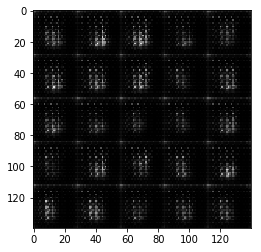

Epoch 1/2... Discriminator Loss: 0.1999... Generator Loss: 3.4834
Epoch 1/2... Discriminator Loss: 0.1608... Generator Loss: 2.8514
Epoch 1/2... Discriminator Loss: 0.2042... Generator Loss: 2.8879
Epoch 1/2... Discriminator Loss: 0.2125... Generator Loss: 2.6934
Epoch 1/2... Discriminator Loss: 0.8126... Generator Loss: 1.0840
Epoch 1/2... Discriminator Loss: 0.5435... Generator Loss: 1.5726
Epoch 1/2... Discriminator Loss: 1.2029... Generator Loss: 4.8944
Epoch 1/2... Discriminator Loss: 0.4122... Generator Loss: 2.0591
Epoch 1/2... Discriminator Loss: 0.3203... Generator Loss: 2.9740
Epoch 1/2... Discriminator Loss: 0.5174... Generator Loss: 1.5455


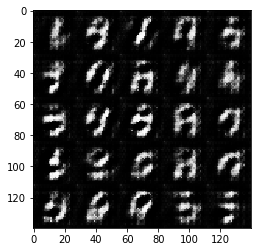

Epoch 1/2... Discriminator Loss: 0.6711... Generator Loss: 2.7470
Epoch 1/2... Discriminator Loss: 0.8099... Generator Loss: 3.0991
Epoch 1/2... Discriminator Loss: 0.8143... Generator Loss: 0.8980
Epoch 2/2... Discriminator Loss: 1.7926... Generator Loss: 0.2990
Epoch 2/2... Discriminator Loss: 0.7360... Generator Loss: 2.2210
Epoch 2/2... Discriminator Loss: 0.7920... Generator Loss: 1.1658
Epoch 2/2... Discriminator Loss: 0.6850... Generator Loss: 1.7537
Epoch 2/2... Discriminator Loss: 0.7601... Generator Loss: 1.1065
Epoch 2/2... Discriminator Loss: 0.9776... Generator Loss: 1.5276
Epoch 2/2... Discriminator Loss: 1.3396... Generator Loss: 0.5145


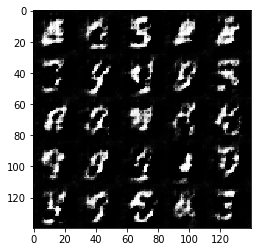

Epoch 2/2... Discriminator Loss: 0.8935... Generator Loss: 0.9491
Epoch 2/2... Discriminator Loss: 0.7231... Generator Loss: 1.5304
Epoch 2/2... Discriminator Loss: 0.8335... Generator Loss: 2.1659
Epoch 2/2... Discriminator Loss: 0.8624... Generator Loss: 1.1566
Epoch 2/2... Discriminator Loss: 0.7776... Generator Loss: 1.1082
Epoch 2/2... Discriminator Loss: 0.7886... Generator Loss: 1.0502
Epoch 2/2... Discriminator Loss: 0.6699... Generator Loss: 1.5961
Epoch 2/2... Discriminator Loss: 1.1953... Generator Loss: 0.5320
Epoch 2/2... Discriminator Loss: 0.7425... Generator Loss: 1.7826
Epoch 2/2... Discriminator Loss: 0.7751... Generator Loss: 1.6256


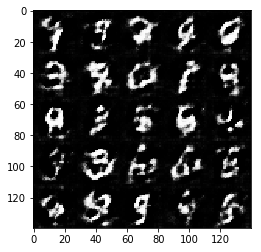

Epoch 2/2... Discriminator Loss: 0.9506... Generator Loss: 0.7677
Epoch 2/2... Discriminator Loss: 0.9838... Generator Loss: 2.1167
Epoch 2/2... Discriminator Loss: 0.7820... Generator Loss: 0.9601
Epoch 2/2... Discriminator Loss: 1.0156... Generator Loss: 2.1569
Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 2.1907
Epoch 2/2... Discriminator Loss: 0.8672... Generator Loss: 0.8279


In [219]:
batch_size = 256
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5603... Generator Loss: 1.5924
Epoch 1/1... Discriminator Loss: 0.2844... Generator Loss: 4.2290
Epoch 1/1... Discriminator Loss: 0.3172... Generator Loss: 1.9291
Epoch 1/1... Discriminator Loss: 0.3623... Generator Loss: 8.6345
Epoch 1/1... Discriminator Loss: 0.4564... Generator Loss: 1.1384
Epoch 1/1... Discriminator Loss: 1.0434... Generator Loss: 0.4876
Epoch 1/1... Discriminator Loss: 0.2196... Generator Loss: 8.8721
Epoch 1/1... Discriminator Loss: 0.5721... Generator Loss: 4.0243
Epoch 1/1... Discriminator Loss: 0.8148... Generator Loss: 5.6093
Epoch 1/1... Discriminator Loss: 1.6785... Generator Loss: 0.2797


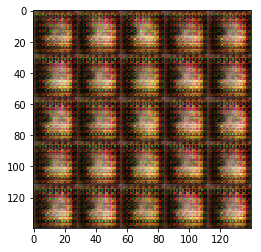

Epoch 1/1... Discriminator Loss: 0.3569... Generator Loss: 2.8167
Epoch 1/1... Discriminator Loss: 0.4242... Generator Loss: 3.9256
Epoch 1/1... Discriminator Loss: 0.3069... Generator Loss: 1.9491
Epoch 1/1... Discriminator Loss: 0.2045... Generator Loss: 2.7881
Epoch 1/1... Discriminator Loss: 0.3079... Generator Loss: 1.8003
Epoch 1/1... Discriminator Loss: 0.2633... Generator Loss: 2.9290
Epoch 1/1... Discriminator Loss: 0.8495... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 0.4592... Generator Loss: 1.4607
Epoch 1/1... Discriminator Loss: 0.6208... Generator Loss: 1.4650
Epoch 1/1... Discriminator Loss: 0.4269... Generator Loss: 2.7102


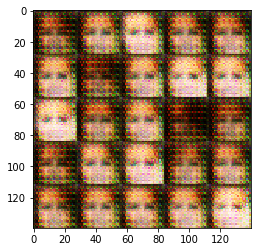

Epoch 1/1... Discriminator Loss: 0.5663... Generator Loss: 1.2628
Epoch 1/1... Discriminator Loss: 0.4698... Generator Loss: 2.0700
Epoch 1/1... Discriminator Loss: 1.5852... Generator Loss: 0.3112
Epoch 1/1... Discriminator Loss: 0.5290... Generator Loss: 2.0907
Epoch 1/1... Discriminator Loss: 0.5350... Generator Loss: 1.9566
Epoch 1/1... Discriminator Loss: 0.4650... Generator Loss: 2.8412
Epoch 1/1... Discriminator Loss: 0.6291... Generator Loss: 1.6472
Epoch 1/1... Discriminator Loss: 0.5350... Generator Loss: 1.6593
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 1.1535
Epoch 1/1... Discriminator Loss: 1.1811... Generator Loss: 1.3525


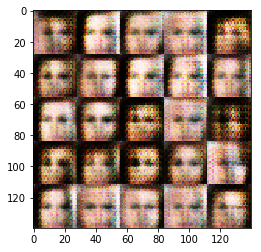

Epoch 1/1... Discriminator Loss: 0.7859... Generator Loss: 1.2444
Epoch 1/1... Discriminator Loss: 0.7722... Generator Loss: 1.0574
Epoch 1/1... Discriminator Loss: 0.8097... Generator Loss: 0.9131
Epoch 1/1... Discriminator Loss: 1.1670... Generator Loss: 0.8333
Epoch 1/1... Discriminator Loss: 1.1545... Generator Loss: 2.2453
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 1.3831
Epoch 1/1... Discriminator Loss: 1.7096... Generator Loss: 0.4504
Epoch 1/1... Discriminator Loss: 1.0459... Generator Loss: 1.0900
Epoch 1/1... Discriminator Loss: 1.2664... Generator Loss: 0.9179
Epoch 1/1... Discriminator Loss: 0.8198... Generator Loss: 1.2609


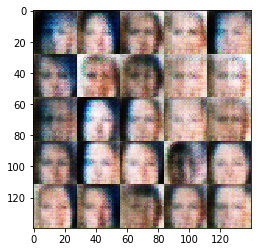

Epoch 1/1... Discriminator Loss: 0.8916... Generator Loss: 1.3844
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 0.8131
Epoch 1/1... Discriminator Loss: 0.9427... Generator Loss: 1.1233
Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 1.0345
Epoch 1/1... Discriminator Loss: 0.9054... Generator Loss: 0.8730
Epoch 1/1... Discriminator Loss: 0.7816... Generator Loss: 1.0653
Epoch 1/1... Discriminator Loss: 0.5446... Generator Loss: 1.8601
Epoch 1/1... Discriminator Loss: 0.7981... Generator Loss: 1.1531
Epoch 1/1... Discriminator Loss: 1.1880... Generator Loss: 1.4909
Epoch 1/1... Discriminator Loss: 0.9192... Generator Loss: 1.3283


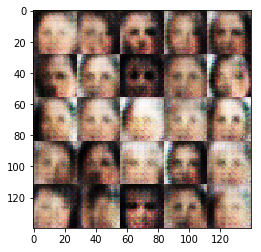

Epoch 1/1... Discriminator Loss: 0.8768... Generator Loss: 1.6184
Epoch 1/1... Discriminator Loss: 0.9115... Generator Loss: 1.6318
Epoch 1/1... Discriminator Loss: 0.8357... Generator Loss: 1.1988
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.2724
Epoch 1/1... Discriminator Loss: 1.0529... Generator Loss: 0.8898
Epoch 1/1... Discriminator Loss: 1.0921... Generator Loss: 1.4338
Epoch 1/1... Discriminator Loss: 0.9244... Generator Loss: 1.1178
Epoch 1/1... Discriminator Loss: 1.2733... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 1.0974... Generator Loss: 1.8001
Epoch 1/1... Discriminator Loss: 0.9151... Generator Loss: 1.8249


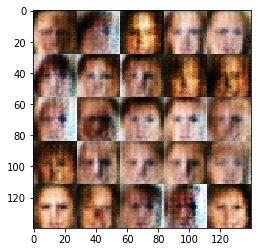

Epoch 1/1... Discriminator Loss: 1.1172... Generator Loss: 1.8244
Epoch 1/1... Discriminator Loss: 0.8728... Generator Loss: 1.2787
Epoch 1/1... Discriminator Loss: 0.8196... Generator Loss: 0.8927
Epoch 1/1... Discriminator Loss: 0.9904... Generator Loss: 0.9374
Epoch 1/1... Discriminator Loss: 0.8367... Generator Loss: 1.3261
Epoch 1/1... Discriminator Loss: 1.1876... Generator Loss: 1.1472
Epoch 1/1... Discriminator Loss: 0.9116... Generator Loss: 1.2772
Epoch 1/1... Discriminator Loss: 0.8685... Generator Loss: 1.6595
Epoch 1/1... Discriminator Loss: 0.7777... Generator Loss: 1.3743
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 1.7438


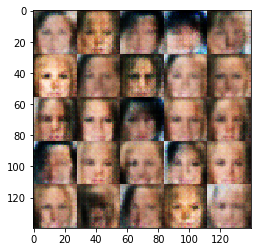

Epoch 1/1... Discriminator Loss: 1.1921... Generator Loss: 0.8621
Epoch 1/1... Discriminator Loss: 0.7809... Generator Loss: 1.4855
Epoch 1/1... Discriminator Loss: 0.8464... Generator Loss: 1.3186
Epoch 1/1... Discriminator Loss: 0.9727... Generator Loss: 1.6630
Epoch 1/1... Discriminator Loss: 1.0143... Generator Loss: 1.6629
Epoch 1/1... Discriminator Loss: 1.0314... Generator Loss: 1.2947
Epoch 1/1... Discriminator Loss: 0.8144... Generator Loss: 1.3412
Epoch 1/1... Discriminator Loss: 0.9771... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 1.5120... Generator Loss: 2.6046
Epoch 1/1... Discriminator Loss: 1.0444... Generator Loss: 1.2212


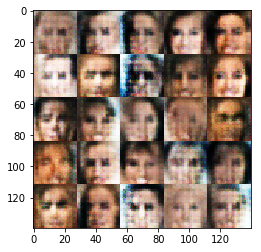

Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.4974
Epoch 1/1... Discriminator Loss: 1.0512... Generator Loss: 1.0172
Epoch 1/1... Discriminator Loss: 1.0447... Generator Loss: 1.5905
Epoch 1/1... Discriminator Loss: 1.1126... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.0488... Generator Loss: 1.2038
Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 1.4226
Epoch 1/1... Discriminator Loss: 1.2421... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.1888... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 1.3077
Epoch 1/1... Discriminator Loss: 1.0723... Generator Loss: 0.8392


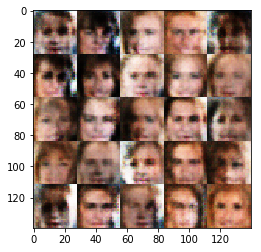

Epoch 1/1... Discriminator Loss: 1.0606... Generator Loss: 1.1371
Epoch 1/1... Discriminator Loss: 1.0340... Generator Loss: 1.1439
Epoch 1/1... Discriminator Loss: 1.1820... Generator Loss: 1.1084
Epoch 1/1... Discriminator Loss: 1.0865... Generator Loss: 1.0393
Epoch 1/1... Discriminator Loss: 1.2648... Generator Loss: 0.5264
Epoch 1/1... Discriminator Loss: 1.4377... Generator Loss: 0.5035
Epoch 1/1... Discriminator Loss: 1.0287... Generator Loss: 0.9830
Epoch 1/1... Discriminator Loss: 1.2160... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.6273
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 1.3216


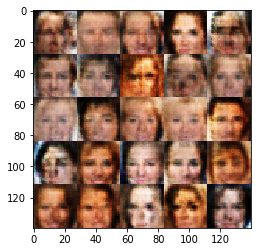

Epoch 1/1... Discriminator Loss: 1.1492... Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 1.2361
Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 0.6231
Epoch 1/1... Discriminator Loss: 0.9797... Generator Loss: 1.7323
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 0.9453... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 1.9284
Epoch 1/1... Discriminator Loss: 1.1634... Generator Loss: 0.8977
Epoch 1/1... Discriminator Loss: 1.0483... Generator Loss: 1.6295
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.7956


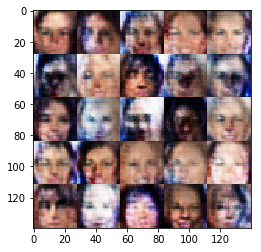

Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.0163... Generator Loss: 1.2257
Epoch 1/1... Discriminator Loss: 1.0025... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.7598
Epoch 1/1... Discriminator Loss: 1.1146... Generator Loss: 0.8825
Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 0.6077
Epoch 1/1... Discriminator Loss: 1.2790... Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 1.0676... Generator Loss: 0.8232
Epoch 1/1... Discriminator Loss: 1.1174... Generator Loss: 0.7278
Epoch 1/1... Discriminator Loss: 1.0222... Generator Loss: 1.1401


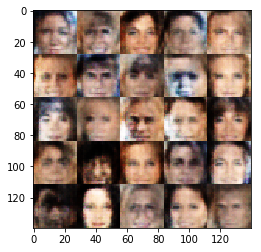

Epoch 1/1... Discriminator Loss: 0.9509... Generator Loss: 0.9823
Epoch 1/1... Discriminator Loss: 0.9601... Generator Loss: 0.9455
Epoch 1/1... Discriminator Loss: 1.1185... Generator Loss: 0.7680
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 1.5968
Epoch 1/1... Discriminator Loss: 1.0641... Generator Loss: 1.2747
Epoch 1/1... Discriminator Loss: 1.1312... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 0.9306... Generator Loss: 0.8973
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 1.1271
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.5686
Epoch 1/1... Discriminator Loss: 1.2226... Generator Loss: 0.7868


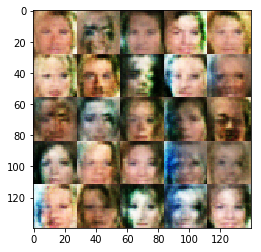

Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 0.6884
Epoch 1/1... Discriminator Loss: 1.0671... Generator Loss: 0.7589
Epoch 1/1... Discriminator Loss: 1.0513... Generator Loss: 0.8324
Epoch 1/1... Discriminator Loss: 1.1543... Generator Loss: 1.5484
Epoch 1/1... Discriminator Loss: 0.9489... Generator Loss: 1.1753
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.9402
Epoch 1/1... Discriminator Loss: 1.0019... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.0991... Generator Loss: 0.9140
Epoch 1/1... Discriminator Loss: 1.1586... Generator Loss: 1.1763
Epoch 1/1... Discriminator Loss: 0.9785... Generator Loss: 1.3123


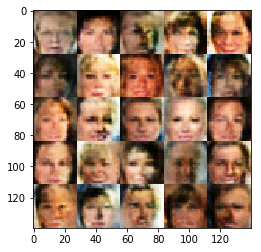

Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 0.8654
Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 0.8691
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.2090... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.1516... Generator Loss: 1.7291
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 1.0918
Epoch 1/1... Discriminator Loss: 1.0475... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 1.0058... Generator Loss: 0.9435
Epoch 1/1... Discriminator Loss: 1.2155... Generator Loss: 1.5864


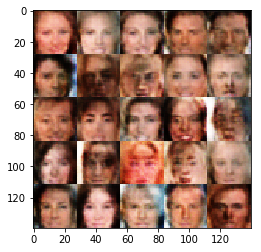

Epoch 1/1... Discriminator Loss: 0.8061... Generator Loss: 1.1436
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 0.9832
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 1.3179
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 1.1005
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.4419
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 1.7434
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 1.1647
Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 0.7380


In [220]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.